In [1]:
from modules import node, bandits, system
from modules import utils
from configs import config

import numpy as np
import pickle
import matplotlib.pyplot as plt

In [3]:
# Load data
with open('../data/channel_data_bs_5_140_ghz', 'rb') as fp:
    dataset_1 = pickle.load(fp)

# with open('../data/channel_data_round_2.pickle', 'rb') as fp:
#     dataset_2 = pickle.load(fp)

# with open('../data/channel_data_round_3.pickle', 'rb') as fp:
#     dataset_3 = pickle.load(fp)

# Create the channel and location data
H_1, loc_1 = utils.craft_data(dataset_1)
# H_2, loc_2 = utils.craft_data(dataset_2)
# H_3, loc_3 = utils.craft_data(dataset_3)

# concatenate the data
H = np.concatenate([H_1], axis=0)
loc = np.concatenate([loc_1], axis=0)

Before discarding zero data:  (8065, 4, 16) (8065, 2)
After discarding zero data:  (8064, 4, 16) (8064, 2)


In [4]:
# System configuration
# BS: 16 antennas and codebook size of 8
N_b = 16
M_b = 8

# UE: 4 antennas and codebook size of 4
N_u = 4
M_u = 4

# Location of BS
x_bs = dataset_1[0]['basestation']['location'][0][0]
y_bs = dataset_1[0]['basestation']['location'][0][1]

# Only the BS 5 is selected from the DeepMIMO dataset
BS = node.TRANSCEIVER(x=x_bs, y=y_bs, N=N_b, P=config.P_BS, M=M_b)
BS.construct_DFT_codebook(q=3)

UE = node.TRANSCEIVER(x=None, y=None, N=N_u, P=None, M=M_u)
UE.construct_DFT_codebook(q=3)

s = system.System(BS=BS, UE=UE, H=H, loc=loc)

In [34]:
with open('../data/probing', 'rb') as fp:
    probing = pickle.load(fp)

s.loc = probing

In [36]:
lin_ucb_probing = s.calc_SE_using_LinUCB(delta=0.01, d=4)
average_lin_ucb_probing = s.calc_average_SE(lin_ucb_probing, w=100)

t = 0: pull arm 0, receive reward 0.006946135976763151
t = 1: pull arm 1, receive reward 0.0010308131828311686
t = 2: pull arm 2, receive reward 0.2951345937545782
t = 3: pull arm 3, receive reward 0.007761287020569237
t = 4: pull arm 4, receive reward 9.045646906997145e-06
t = 5: pull arm 5, receive reward 1.928196925872278e-06
t = 6: pull arm 6, receive reward 0.018959921286138194
t = 7: pull arm 7, receive reward 1.0204894043759326e-05
t = 8: pull arm 8, receive reward 0.013147898573411065
t = 9: pull arm 9, receive reward 0.002226834018119055
t = 10: pull arm 10, receive reward 6.818598156179755
t = 11: pull arm 10, receive reward 0.6954712665628736
t = 12: pull arm 10, receive reward 0.5042283948074456
t = 13: pull arm 10, receive reward 1.2583690183089982
t = 14: pull arm 11, receive reward 0.0014291554051867495
t = 15: pull arm 12, receive reward 0.0005341613332065089
t = 16: pull arm 13, receive reward 0.00037831822596148443
t = 17: pull arm 10, receive reward 0.836279806000081

In [29]:
lin_ucb = s.calc_SE_using_LinUCB(delta=0.01)
average_lin_ucb = s.calc_average_SE(lin_ucb, w=100)

ValueError: shapes (1,8) and (2,1) not aligned: 8 (dim 1) != 2 (dim 0)

In [6]:
optimal_SE = s.calc_optimal_SE()
average_optimal_SE = s.calc_average_SE(optimal_SE, w=100)

In [43]:
# ucb_1 = s.calc_SE_using_UCB(c=1)
# average_ucb_1 = s.calc_average_SE(ucb_1, w=100)

ucb_5 = s.calc_SE_using_UCB(c=15)
average_ucb_5 = s.calc_average_SE(ucb_5, w=100)

# ucb_10 = s.calc_SE_using_UCB(c=10)
# average_ucb_10 = s.calc_average_SE(ucb_10, w=100)

t = 0: pull arm 0, receive reward 0.0015176632580032655
t = 1: pull arm 1, receive reward 0.0006249214227843704
t = 2: pull arm 2, receive reward 0.6258745783573757
t = 3: pull arm 3, receive reward 0.0010450658410888628
t = 4: pull arm 4, receive reward 8.977012551056731e-05
t = 5: pull arm 5, receive reward 5.651315341235362e-07
t = 6: pull arm 6, receive reward 0.04672372836240801
t = 7: pull arm 7, receive reward 3.281876398587803e-05
t = 8: pull arm 8, receive reward 0.01005871765884689
t = 9: pull arm 9, receive reward 0.0005455414742497309
t = 10: pull arm 10, receive reward 2.4892006050354105
t = 11: pull arm 11, receive reward 0.00028452637052023017
t = 12: pull arm 12, receive reward 4.0363969517119534e-05
t = 13: pull arm 13, receive reward 1.968090434253891e-05
t = 14: pull arm 14, receive reward 0.31920178602185856
t = 15: pull arm 15, receive reward 9.415775192442077e-05
t = 16: pull arm 16, receive reward 0.34866758618402843
t = 17: pull arm 17, receive reward 0.01516821

In [8]:
# Setup for figure size
plt.figure(figsize=(3.5, 2.625), dpi=500)

#Font setup
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 8

#Setup for tick and axes and more
plt.rcParams['xtick.minor.visible'] = False
plt.rcParams['ytick.minor.visible'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 0.4
plt.rcParams['ytick.major.width'] = 0.4
plt.rcParams['axes.linewidth'] = 0.4

<Figure size 1750x1312.5 with 0 Axes>

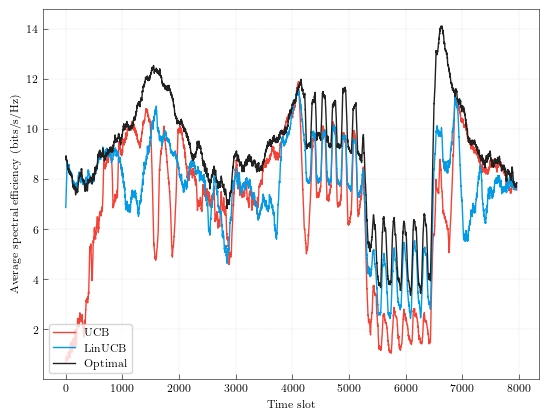

In [45]:
plt.plot(average_ucb_5, color='#F44336', linewidth='1', label='UCB')
plt.plot(average_lin_ucb_probing, color='#039BE5', linewidth='1', label='LinUCB')
plt.plot(average_optimal_SE, color='#212121', linewidth='1', label='Optimal')

plt.legend(loc='lower left')
plt.xlabel('Time slot')
plt.ylabel('Average spectral efficiency (bits/s/Hz)')
plt.grid(color='gainsboro', linestyle='--', linewidth=0.3)


plt.savefig("real_time_benchmark.pdf")
plt.show()

In [44]:
print(np.mean(optimal_SE), np.mean(lin_ucb_probing), np.mean(ucb_5))

9.01903418581914 7.561776883175136 6.9442830884937194


In [11]:
def cdf(arr: np.array) -> list:
    
    x = range(25)
    prob = [np.sum(arr < val)/len(arr) for val in x]

    return x, prob

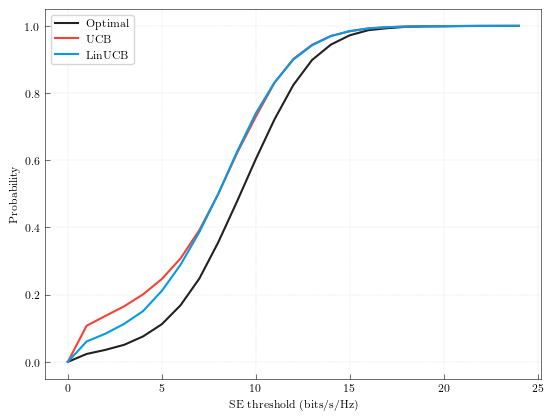

In [12]:
x_optimal, prob_optimal = cdf(optimal_SE)

x_ucb, prob_ucb = cdf(ucb_5)

x_lin_ucb, prob_lin_ucb = cdf(lin_ucb)

plt.plot(x_optimal, prob_optimal, label='Optimal', color='#212121')
plt.plot(x_ucb, prob_ucb, label='UCB', color='#F44336')
plt.plot(x_lin_ucb, prob_lin_ucb, label='LinUCB', color='#039BE5')

plt.xlabel('SE threshold (bits/s/Hz)')
plt.ylabel('Probability')

plt.grid(color='gainsboro', linestyle='--', linewidth=0.3)
plt.legend()
plt.savefig("CDF.pdf")
plt.show()